### 2. Import Libraries and Data

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Import file

df = pd.read_csv(r'/Users/matthewerrington/Downloads/airbnb_jan8b - Sheet1.csv', index_col = False)

In [45]:
df.shape

(6653, 10)

### 3. Clean your data so that it's ready for analysis

In [20]:
df.isnull().sum()

search            0
airbnb-href       0
rating          610
reviews         295
city              6
price          1302
type             79
population        0
michelin       1224
mich_pop       1224
dtype: int64

Reviews had less than 5% with missing data. I will replace NaN with the mean of the column. Price had roughly 19% with missing figures. Need to investigate more.

In [22]:
df['reviews'].fillna((df['reviews'].mean()), inplace=True)

In [23]:
df['price'].fillna((df['price'].mean()), inplace=True)

In [24]:
df.isnull().sum()

search            0
airbnb-href       0
rating          610
reviews           0
city              6
price             0
type             79
population        0
michelin       1224
mich_pop       1224
dtype: int64

### 4. Explore your data visually via scatterplot

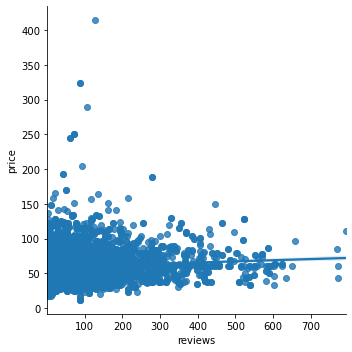

In [25]:
# Create a scatterplot for the population and michelin columns in seaborn

sns.lmplot(x = 'reviews', y = 'price', data = df)

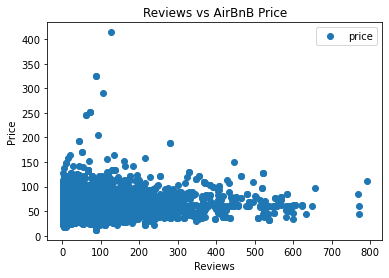

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'reviews', y='price',style='o') 
plt.title('Reviews vs AirBnB Price')  
plt.xlabel('Reviews')  
plt.ylabel('Price')  
plt.show()

My hypothesis was that there are more reviews the lower the price of the AirBnB location is.

### 6. Reshape the variables into NumPy arrays

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['reviews'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [28]:
X

array([[87.32132746],
       [87.32132746],
       [87.32132746],
       ...,
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [29]:
y

array([[60.49691646],
       [60.49691646],
       [60.49691646],
       ...,
       [48.        ],
       [60.49691646],
       [48.        ]])

### 7. Split the data into two sets: a training set and a test set

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a linear regression

In [31]:
# Create a regression object.

regression = LinearRegression() 

In [32]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### 9. Create a plot that shows the regression line on the test set

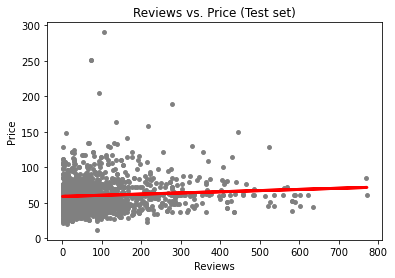

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Reviews vs. Price (Test set)')
plot_test.xlabel('Reviews')
plot_test.ylabel('Price')
plot_test.show()

### 10. Write the interpretation of how well the line appears to fit the data

The line seems to show the opposite of my hypothesis. The amount of reviews seems to increase as the price of the AirBnB also increases, albiet at a low rate.

### 11. Check the model performance statistics - MSE and R2

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [46]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01646471]]
Mean squared error:  437.0681196276296
R2 score:  0.00645656310351983


### 12. Compare the predicted y values with the actual y values in a dataframe

In [37]:
y_predicted

array([[59.19987588],
       [59.46331122],
       [59.4139171 ],
       ...,
       [59.90785838],
       [59.43038181],
       [59.18341117]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,60.496916,59.199876
1,47.000000,59.463311
2,60.496916,59.413917
3,55.000000,59.331594
4,141.000000,61.751906
5,49.000000,61.554329
6,60.496916,60.582911
7,60.496916,61.274429
8,60.496916,60.303011
9,106.000000,60.681700


In [47]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01646471]]
Mean squared error:  437.0681196276296
R2 score:  0.00645656310351983


### 13. Include your thoughts on how well the model performed on the test set.  Is there any possible data bias?

The slope is a low positive value - showing that as reviews rise so does the price of an AirBnB. However, it is a low figure meaning that there is not a strong influence.

A mean squared error of 437 is quite large for this data set. The metric shows that the model did not perform well on the set since there is little correlation between the columns.

The R2 figure shows that there is not a strong fit. 

In conclusion, the model did not fit very well.